# Script to Count Word Frequency and Plot

## Load Into DataFrame

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

# Set name of file
filename = 'summaries.csv'

# Read to DataFrame
df = pd.read_csv(filename, sep=',', header=[0], error_bad_lines=False)
df.head()

,Id,Accession,title,summary,taxon
0,200112120,GSE112120,Risk SNPs mediated promoter-enhancer switching...,To determine the binding of H3K4me1 and H3K4me...,Homo sapiens
1,200117735,GSE117735,The ATPase module of mammalian SWI/SNF family ...,This SuperSeries is composed of the SubSeries ...,Homo sapiens
2,200117734,GSE117734,The mSWI/SNF ATPase module mediates subcomplex...,Perturbations to mammalian SWI/SNF (mSWI/SNF) ...,Homo sapiens
3,200128119,GSE128119,COX-2 mediates tumor-stromal Prolactin signali...,Tumor-stromal communication within the microen...,Homo sapiens
4,200126367,GSE126367,Copy number analysis of selumetinib-resistant ...,Copy number analysis to compare parental color...,Homo sapiens


## Separate words

In [2]:
word_list = list()
for i in range(df.shape[0]):
    df_id, df_acc, df_tit, df_tax = df.loc[i,['Id','Accession','title','taxon']]
    summary_words = df.loc[i,'summary'].split()
    for word in summary_words:
        word_list.append( (word, df_id) )
word_list[:5]

[('To', 200112120),
 ('determine', 200112120),
 ('the', 200112120),
 ('binding', 200112120),
 ('of', 200112120)]

## Group-by words and count them

In [3]:
word_frequency = pd.DataFrame(word_list, columns='word Id'.split()).groupby('word').count()
word_frequency.sort_values(by='Id', ascending=False, inplace=True)
word_frequency.reset_index(inplace=True)
word_frequency.head(25)

,word,Id
0,of,412
1,the,340
2,in,296
3,and,289
4,to,184
5,a,140
6,that,104
7,with,97
8,is,76
9,for,75


## Plot histogram

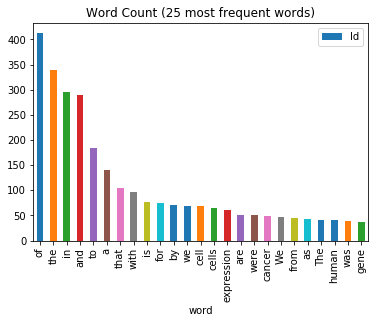

In [4]:
histogram = word_frequency.iloc[:25].plot.bar(x='word',y='Id',title='Word Count (25 most frequent words)')

## Save histogram

In [5]:
fig = histogram.get_figure()
fig.savefig('histogram.png')